In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from scipy.integrate import solve_ivp, odeint

In [31]:
# SEIR.

# sub de subida.
# des de descida.

def sir(t, y, R0, gamma):
    s, i, r = y
    dsdt = - R0 * s * i
    didt = R0 * s * i - gamma * i
    drdt = gamma * i
    return dsdt, didt, drdt

gamma = 1
t0, t = 0, 100
i0 = 1e-5
r0 = 0
s0 = 1 - i0 - r0

t_discreto = np.linspace(t0,t,t)

lista = []

nR0 = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

for R0 in nR0:
    res_LSODA = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], args=(R0, gamma), t_eval=t_discreto, method='LSODA')
    lista.append([np.log(res_LSODA.y[1]), R0])
    
    
#res_LSODA = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], args=(R0[r]), t_eval=t_discreto)


/tmp/ipykernel_2313/2840345695.py:27: RuntimeWarning: invalid value encountered in log
  lista.append([np.log(res_LSODA.y[1]), R0])


In [42]:
lista[3][1]

1.4

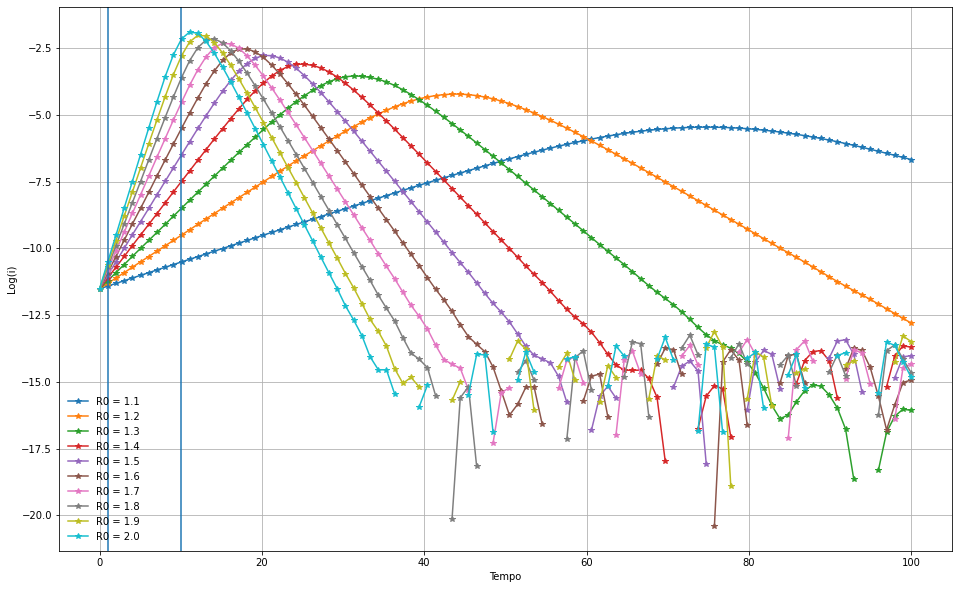

In [18]:
# Plot para a medição dos intervalos a serem considerados.

T0 = 1
T  = 10

fig, ax = plt.subplots(figsize=(16,10))
[ax.plot(t_discreto, lista[i][0], marker='*', label=f'R0 = {lista[i][1]}') for i in range(len(nR0))]

ax.axvline(x=T0)
ax.axvline(x=T)

ax.set_xlabel('Tempo')
ax.set_ylabel('Log(i)')
ax.grid(True)
ax.legend(frameon=False)

In [19]:
lista_coef_R0_subida = []
lista_coef_R0_descida = []

[Text(0, 0.5, 'log(i)'), Text(0, 0.5, 'log(i)')]

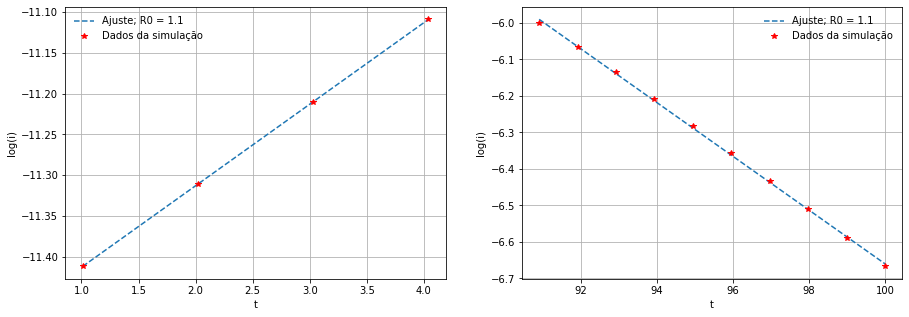

In [20]:
# R0 = 1.1

R0 = 1.1
curva = 0

# Encontrando o coeficiente da subida.


# Valores coletados pessoalmente

T0_sub_1_1 = 1
T_sub_1_1 = 5

arr_sub = lista[curva][0][T0_sub_1_1:T_sub_1_1]

arr_t_sub = t_discreto[T0_sub_1_1:T_sub_1_1]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])



# Encontrando o coeficiente da descida.


# Valores coletados pessoalmente

T0_des_1_1 = 90
T_des_1_1 = 100

arr_des = lista[curva][0][T0_des_1_1:T_des_1_1]

arr_t_des = t_discreto[T0_des_1_1:T_des_1_1]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])

# Prova

fig, bx = plt.subplots(figsize=(15,5), ncols=2)

bx[0].plot(arr_t_sub, (a_sub + arr_t_sub * b_sub),'--' , label=f'Ajuste; R0 = {R0}')
bx[0].plot(arr_t_sub, arr_sub, '*r', label='Dados da simulação')

bx[1].plot(arr_t_des, (a_des + arr_t_des * b_des),'--' , label=f'Ajuste; R0 = {R0}')
bx[1].plot(arr_t_des, arr_des, '*r', label='Dados da simulação')

[bx[i].legend(frameon=False) for i in range(0,2)]
[bx[i].grid(True) for i in range(0,2)]
[bx[i].set_xlabel('t') for i in range(0,2)]
[bx[i].set_ylabel('log(i)') for i in range(0,2)]



[Text(0, 0.5, 'log(i)'), Text(0, 0.5, 'log(i)')]

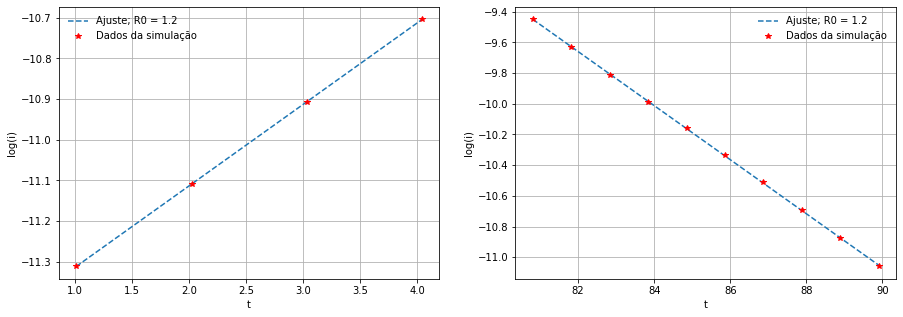

In [21]:
# R0 = 1.2

R0 = 1.2
curva = 1



# Encontrando o coeficiente da subida.


# Valores coletados pessoalmente

T0_sub_1_2 = 1
T_sub_1_2 = 5

arr_sub = lista[curva][0][T0_sub_1_2:T_sub_1_2]

arr_t_sub = t_discreto[T0_sub_1_2:T_sub_1_2]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])



# Encontrando o coeficiente da descida.


# Valores coletados pessoalmente

T0_des_1_2 = 80
T_des_1_2 = 90

arr_des = lista[curva][0][T0_des_1_2:T_des_1_2]

arr_t_des = t_discreto[T0_des_1_2:T_des_1_2]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])

# Prova

fig, bx = plt.subplots(figsize=(15,5), ncols=2)

bx[0].plot(arr_t_sub, (a_sub + arr_t_sub * b_sub),'--' , label=f'Ajuste; R0 = {R0}')
bx[0].plot(arr_t_sub, arr_sub, '*r', label='Dados da simulação')

bx[1].plot(arr_t_des, (a_des + arr_t_des * b_des),'--' , label=f'Ajuste; R0 = {R0}')
bx[1].plot(arr_t_des, arr_des, '*r', label='Dados da simulação')

[bx[i].legend(frameon=False) for i in range(0,2)]
[bx[i].grid(True) for i in range(0,2)]
[bx[i].set_xlabel('t') for i in range(0,2)]
[bx[i].set_ylabel('log(i)') for i in range(0,2)]

[Text(0, 0.5, 'log(i)'), Text(0, 0.5, 'log(i)')]

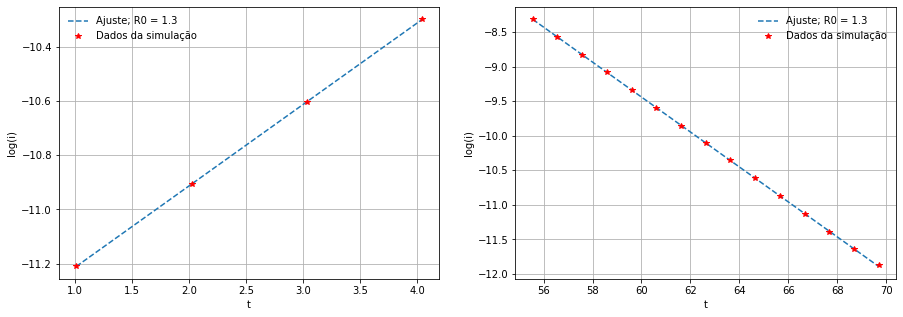

In [22]:
# R0 = 1.333

R0 = 1.3
curva = 2



# Encontrando o coeficiente da subida.


# Valores coletados pessoalmente

T0_sub_1_3 = 1
T_sub_1_3 = 5

arr_sub = lista[curva][0][T0_sub_1_3:T_sub_1_3]

arr_t_sub = t_discreto[T0_sub_1_3:T_sub_1_3]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])



# Encontrando o coeficiente da descida.


# Valores coletados pessoalmente

T0_des_1_3 = 55
T_des_1_3 = 70

arr_des = lista[curva][0][T0_des_1_3:T_des_1_3]

arr_t_des = t_discreto[T0_des_1_3:T_des_1_3]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])

# Prova

fig, bx = plt.subplots(figsize=(15,5), ncols=2)

bx[0].plot(arr_t_sub, (a_sub + arr_t_sub * b_sub),'--' , label=f'Ajuste; R0 = {R0}')
bx[0].plot(arr_t_sub, arr_sub, '*r', label='Dados da simulação')

bx[1].plot(arr_t_des, (a_des + arr_t_des * b_des),'--' , label=f'Ajuste; R0 = {R0}')
bx[1].plot(arr_t_des, arr_des, '*r', label='Dados da simulação')

[bx[i].legend(frameon=False) for i in range(0,2)]
[bx[i].grid(True) for i in range(0,2)]
[bx[i].set_xlabel('t') for i in range(0,2)]
[bx[i].set_ylabel('log(i)') for i in range(0,2)]

[Text(0, 0.5, 'log(i)'), Text(0, 0.5, 'log(i)')]

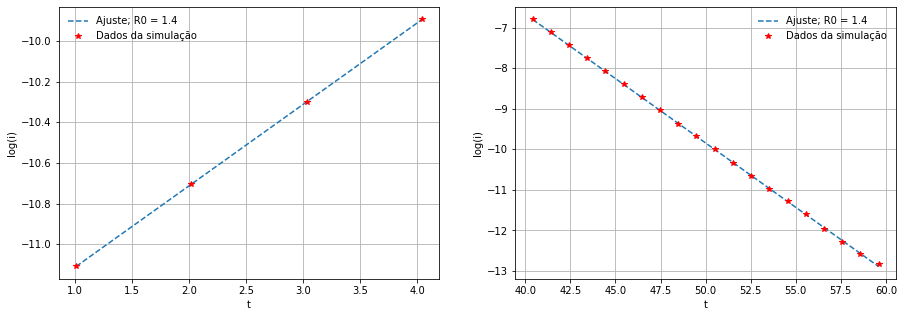

In [23]:
# R0 = 1.4

R0 = 1.4
curva = 3



# Encontrando o coeficiente da subida.


# Valores coletados pessoalmente

T0_sub_1_4 = 1
T_sub_1_4 = 5

arr_sub = lista[curva][0][T0_sub_1_4:T_sub_1_4]

arr_t_sub = t_discreto[T0_sub_1_4:T_sub_1_4]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])



# Encontrando o coeficiente da descida.


# Valores coletados pessoalmente

T0_des_1_4 = 40
T_des_1_4 = 60

arr_des = lista[curva][0][T0_des_1_4:T_des_1_4]

arr_t_des = t_discreto[T0_des_1_4:T_des_1_4]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])

# Prova

fig, bx = plt.subplots(figsize=(15,5), ncols=2)

bx[0].plot(arr_t_sub, (a_sub + arr_t_sub * b_sub),'--' , label=f'Ajuste; R0 = {R0}')
bx[0].plot(arr_t_sub, arr_sub, '*r', label='Dados da simulação')

bx[1].plot(arr_t_des, (a_des + arr_t_des * b_des),'--' , label=f'Ajuste; R0 = {R0}')
bx[1].plot(arr_t_des, arr_des, '*r', label='Dados da simulação')

[bx[i].legend(frameon=False) for i in range(0,2)]
[bx[i].grid(True) for i in range(0,2)]
[bx[i].set_xlabel('t') for i in range(0,2)]
[bx[i].set_ylabel('log(i)') for i in range(0,2)]

[Text(0, 0.5, 'log(i)'), Text(0, 0.5, 'log(i)')]

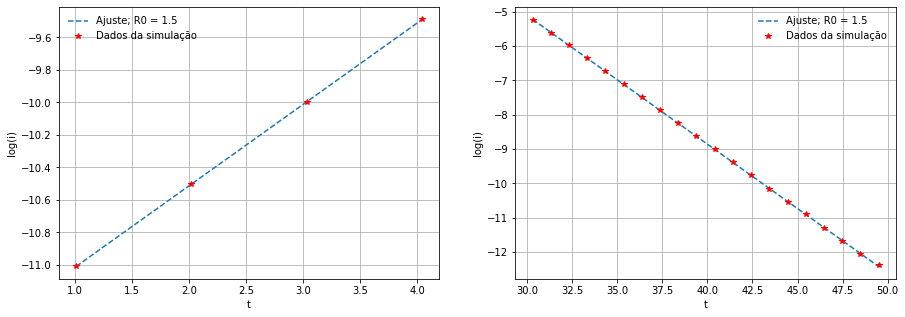

In [24]:
# R0 = 1.5

R0 = 1.5
curva = 4



# Encontrando o coeficiente da subida.


# Valores coletados pessoalmente

T0_sub_1_5 = 1
T_sub_1_5 = 5

arr_sub = lista[curva][0][T0_sub_1_5:T_sub_1_5]

arr_t_sub = t_discreto[T0_sub_1_5:T_sub_1_5]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])



# Encontrando o coeficiente da descida.


# Valores coletados pessoalmente

T0_des_1_5 = 30
T_des_1_5 = 50

arr_des = lista[curva][0][T0_des_1_5:T_des_1_5]

arr_t_des = t_discreto[T0_des_1_5:T_des_1_5]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])

# Prova

fig, bx = plt.subplots(figsize=(15,5), ncols=2)

bx[0].plot(arr_t_sub, (a_sub + arr_t_sub * b_sub),'--' , label=f'Ajuste; R0 = {R0}')
bx[0].plot(arr_t_sub, arr_sub, '*r', label='Dados da simulação')

bx[1].plot(arr_t_des, (a_des + arr_t_des * b_des),'--' , label=f'Ajuste; R0 = {R0}')
bx[1].plot(arr_t_des, arr_des, '*r', label='Dados da simulação')

[bx[i].legend(frameon=False) for i in range(0,2)]
[bx[i].grid(True) for i in range(0,2)]
[bx[i].set_xlabel('t') for i in range(0,2)]
[bx[i].set_ylabel('log(i)') for i in range(0,2)]

[Text(0, 0.5, 'log(i)'), Text(0, 0.5, 'log(i)')]

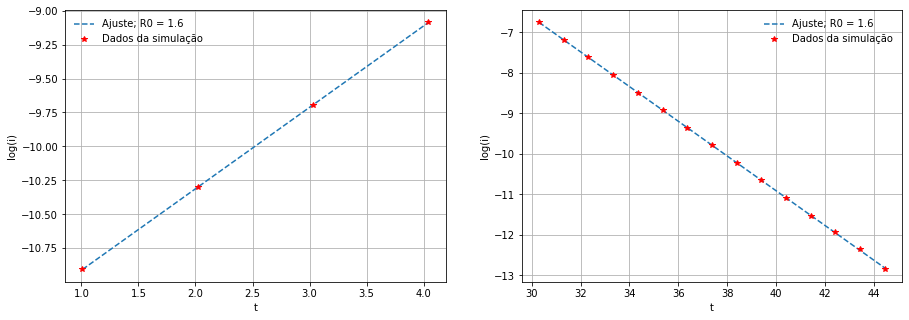

In [25]:
# R0 = 1.6

R0 = 1.6
curva = 5



# Encontrando o coeficiente da subida.


# Valores coletados pessoalmente

T0_sub_1_6 = 1
T_sub_1_6 = 5

arr_sub = lista[curva][0][T0_sub_1_6:T_sub_1_6]

arr_t_sub = t_discreto[T0_sub_1_6:T_sub_1_6]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])



# Encontrando o coeficiente da descida.


# Valores coletados pessoalmente

T0_des_1_6 = 30
T_des_1_6 = 45

arr_des = lista[curva][0][T0_des_1_6:T_des_1_6]

arr_t_des = t_discreto[T0_des_1_6:T_des_1_6]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])

# Prova

fig, bx = plt.subplots(figsize=(15,5), ncols=2)

bx[0].plot(arr_t_sub, (a_sub + arr_t_sub * b_sub),'--' , label=f'Ajuste; R0 = {R0}')
bx[0].plot(arr_t_sub, arr_sub, '*r', label='Dados da simulação')

bx[1].plot(arr_t_des, (a_des + arr_t_des * b_des),'--' , label=f'Ajuste; R0 = {R0}')
bx[1].plot(arr_t_des, arr_des, '*r', label='Dados da simulação')

[bx[i].legend(frameon=False) for i in range(0,2)]
[bx[i].grid(True) for i in range(0,2)]
[bx[i].set_xlabel('t') for i in range(0,2)]
[bx[i].set_ylabel('log(i)') for i in range(0,2)]

[Text(0, 0.5, 'log(i)'), Text(0, 0.5, 'log(i)')]

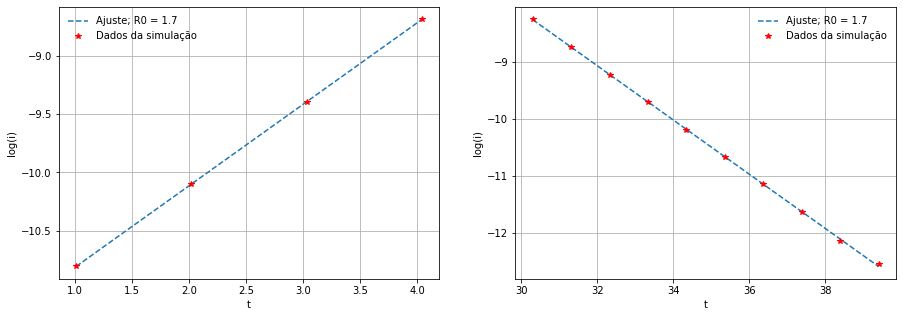

In [26]:
# R0 = 1.7

R0 = 1.7
curva = 6



# Encontrando o coeficiente da subida.


# Valores coletados pessoalmente

T0_sub_1_7 = 1
T_sub_1_7 = 5

arr_sub = lista[curva][0][T0_sub_1_7:T_sub_1_7]

arr_t_sub = t_discreto[T0_sub_1_7:T_sub_1_7]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])



# Encontrando o coeficiente da descida.


# Valores coletados pessoalmente

T0_des_1_7 = 30
T_des_1_7 = 40

arr_des = lista[curva][0][T0_des_1_7:T_des_1_7]

arr_t_des = t_discreto[T0_des_1_7:T_des_1_7]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])

# Prova

fig, bx = plt.subplots(figsize=(15,5), ncols=2)

bx[0].plot(arr_t_sub, (a_sub + arr_t_sub * b_sub),'--' , label=f'Ajuste; R0 = {R0}')
bx[0].plot(arr_t_sub, arr_sub, '*r', label='Dados da simulação')

bx[1].plot(arr_t_des, (a_des + arr_t_des * b_des),'--' , label=f'Ajuste; R0 = {R0}')
bx[1].plot(arr_t_des, arr_des, '*r', label='Dados da simulação')

[bx[i].legend(frameon=False) for i in range(0,2)]
[bx[i].grid(True) for i in range(0,2)]
[bx[i].set_xlabel('t') for i in range(0,2)]
[bx[i].set_ylabel('log(i)') for i in range(0,2)]

[Text(0, 0.5, 'log(i)'), Text(0, 0.5, 'log(i)')]

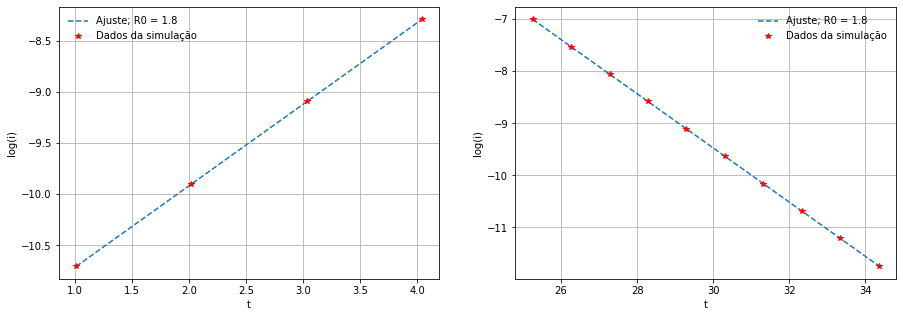

In [27]:
# R0 = 1.8

R0 = 1.8
curva = 7



# Encontrando o coeficiente da subida.


# Valores coletados pessoalmente

T0_sub_1_8 = 1
T_sub_1_8 = 5

arr_sub = lista[curva][0][T0_sub_1_8:T_sub_1_8]

arr_t_sub = t_discreto[T0_sub_1_8:T_sub_1_8]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])



# Encontrando o coeficiente da descida.


# Valores coletados pessoalmente

T0_des_1_8 = 25
T_des_1_8 = 35

arr_des = lista[curva][0][T0_des_1_8:T_des_1_8]

arr_t_des = t_discreto[T0_des_1_8:T_des_1_8]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])


# Prova

fig, bx = plt.subplots(figsize=(15,5), ncols=2)

bx[0].plot(arr_t_sub, (a_sub + arr_t_sub * b_sub),'--' , label=f'Ajuste; R0 = {R0}')
bx[0].plot(arr_t_sub, arr_sub, '*r', label='Dados da simulação')

bx[1].plot(arr_t_des, (a_des + arr_t_des * b_des),'--' , label=f'Ajuste; R0 = {R0}')
bx[1].plot(arr_t_des, arr_des, '*r', label='Dados da simulação')

[bx[i].legend(frameon=False) for i in range(0,2)]
[bx[i].grid(True) for i in range(0,2)]
[bx[i].set_xlabel('t') for i in range(0,2)]
[bx[i].set_ylabel('log(i)') for i in range(0,2)]

[Text(0, 0.5, 'log(i)'), Text(0, 0.5, 'log(i)')]

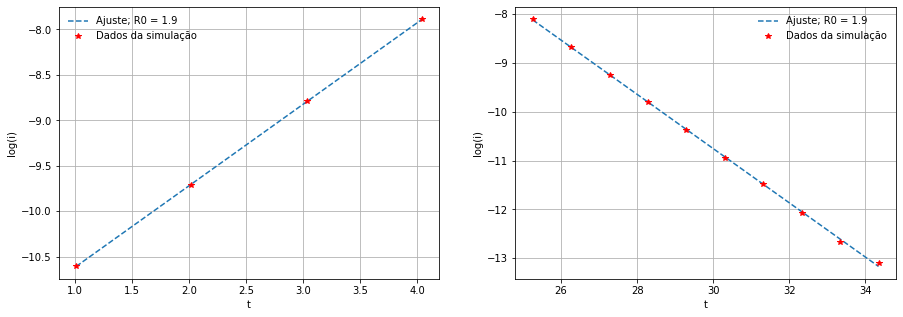

In [28]:
# R0 = 1.9

R0 = 1.9
curva = 8



# Encontrando o coeficiente da subida.


# Valores coletados pessoalmente

T0_sub_1_9 = 1
T_sub_1_9 = 5

arr_sub = lista[curva][0][T0_sub_1_9:T_sub_1_9]

arr_t_sub = t_discreto[T0_sub_1_9:T_sub_1_9]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])



# Encontrando o coeficiente da descida.


# Valores coletados pessoalmente

T0_des_1_9 = 25
T_des_1_9 = 35

arr_des = lista[curva][0][T0_des_1_9:T_des_1_9]

arr_t_des = t_discreto[T0_des_1_9:T_des_1_9]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])


# Prova

fig, bx = plt.subplots(figsize=(15,5), ncols=2)

bx[0].plot(arr_t_sub, (a_sub + arr_t_sub * b_sub),'--' , label=f'Ajuste; R0 = {R0}')
bx[0].plot(arr_t_sub, arr_sub, '*r', label='Dados da simulação')

bx[1].plot(arr_t_des, (a_des + arr_t_des * b_des),'--' , label=f'Ajuste; R0 = {R0}')
bx[1].plot(arr_t_des, arr_des, '*r', label='Dados da simulação')

[bx[i].legend(frameon=False) for i in range(0,2)]
[bx[i].grid(True) for i in range(0,2)]
[bx[i].set_xlabel('t') for i in range(0,2)]
[bx[i].set_ylabel('log(i)') for i in range(0,2)]

[Text(0, 0.5, 'log(i)'), Text(0, 0.5, 'log(i)')]

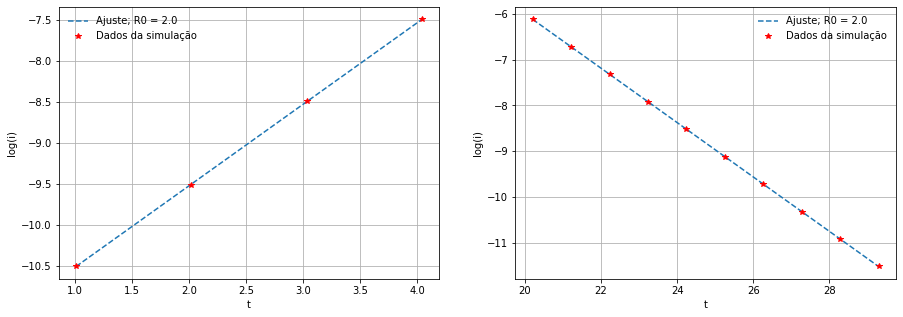

In [29]:
# R0 = 2.0

R0 = 2.0
curva = 9



# Encontrando o coeficiente da subida.


# Valores coletados pessoalmente

T0_sub_2_0 = 1
T_sub_2_0 = 5

arr_sub = lista[curva][0][T0_sub_2_0:T_sub_2_0]

arr_t_sub = t_discreto[T0_sub_2_0:T_sub_2_0]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])



# Encontrando o coeficiente da descida.


# Valores coletados pessoalmente

T0_des_2_0 = 20
T_des_2_0 = 30

arr_des = lista[curva][0][T0_des_2_0:T_des_2_0]

arr_t_des = t_discreto[T0_des_2_0:T_des_2_0]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])


# Prova

fig, bx = plt.subplots(figsize=(15,5), ncols=2)

bx[0].plot(arr_t_sub, (a_sub + arr_t_sub * b_sub),'--' , label=f'Ajuste; R0 = {R0}')
bx[0].plot(arr_t_sub, arr_sub, '*r', label='Dados da simulação')

bx[1].plot(arr_t_des, (a_des + arr_t_des * b_des),'--' , label=f'Ajuste; R0 = {R0}')
bx[1].plot(arr_t_des, arr_des, '*r', label='Dados da simulação')

[bx[i].legend(frameon=False) for i in range(0,2)]
[bx[i].grid(True) for i in range(0,2)]
[bx[i].set_xlabel('t') for i in range(0,2)]
[bx[i].set_ylabel('log(i)') for i in range(0,2)]

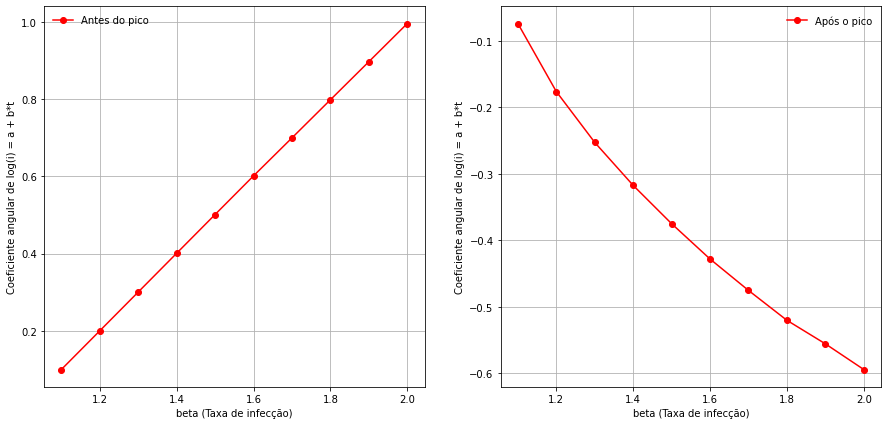

In [30]:
b_subida = []
b_descida = []
R0_eixo = []
[b_subida.append(lista_coef_R0_subida[i][0]) for i in range(0,10)]
[b_descida.append(lista_coef_R0_descida[i][0]) for i in range(0,10)]
[R0_eixo.append(lista_coef_R0_subida[i][1]) for i in range(0,10)]

fig, ax = plt.subplots(figsize=(15,7), ncols=2)
ax[0].plot(R0_eixo, b_subida, '-or', label='Antes do pico')
ax[1].plot(R0_eixo, b_descida, '-or', label='Após o pico')

for i in range(0,2):
    ax[i].grid(True)
    ax[i].legend(frameon=False)
    ax[i].set_xlabel('beta (Taxa de infecção)')
    ax[i].set_ylabel('Coeficiente angular de log(i) = a + b*t')
plt.savefig('coef_angular_versus_R0.pdf')